
## N-gram basert på dewey

I tillegg til 

In [1]:
import dhlab.nbtext as nb
import pandas as pd
import dhlab.module_update as mu
import matplotlib.pyplot as plt

In [2]:
mu.update('dhlab_v2')
import dhlab_v2 as d2

Updated file `C:\Users\larsj\Documents\GitHub\ngram\dhlab_v2.py`

In [3]:
import imp

In [4]:
imp.reload(d2)

<module 'dhlab_v2' from 'C:\\Users\\larsj\\Documents\\GitHub\\ngram\\dhlab_v2.py'>

In [5]:
mu.css()

In [6]:
nb.dewey('610')

{'1': ['6', 'Teknologi'],
 '2': ['61', 'Medisin og helse'],
 '3': ['610', 'Medisin og helse']}

# Råfrekvenser unigram

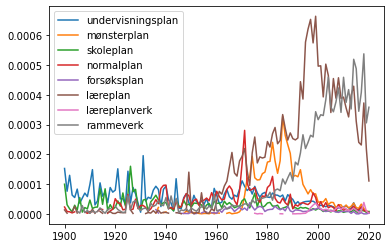

In [13]:
d2.nb_ngram('undervisningsplan, mønsterplan, skoleplan, normalplan, forsøksplan, læreplan, læreplanverk, rammeverk', smooth=1, years =(1900, 2020)).sort_index().plot()

In [16]:
d2.nb_ngram('undervisningsplan, mønsterplan, skoleplan, normalplan, forsøksplan, læreplan, læreplanverk, rammeverk', smooth=1, years =(1800, 2020)).sort_index().to_excel('kirstens_rammeverk_mm.xlsx')

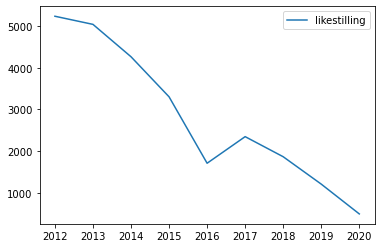

In [7]:
d2.ngram_book("likestilling", period = (2012, 2020)).plot()

In [11]:
kohort_acc = "mig sig dig meg jeg du deg seg han ham hun henne".split()
kohort = "jeg du han hun vi de De Han Du Jeg Vi ".split()

In [12]:
def nplot(wordlist, period = (1950, 2020), func = d2.ngram_book):
    d = func(word = wordlist, period = period)
    ax = d.div(d.sum(axis = 1), axis = 0).rolling(window = 5).mean().plot(figsize = (12, 5), lw = 2)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_color("lightgrey")
    ax.spines["right"].set_color("lightgrey")
    ax.spines["bottom"].set_color("grey")
    ax.spines["left"].set_color("grey")
    ax.spines["bottom"].set_linewidth(1)
    ax.spines["left"].set_linewidth(1)
    #ax.legend(loc='upper left', frameon=False)
    ax.legend(bbox_to_anchor=(1.0, 1.0))
    ax.plot();

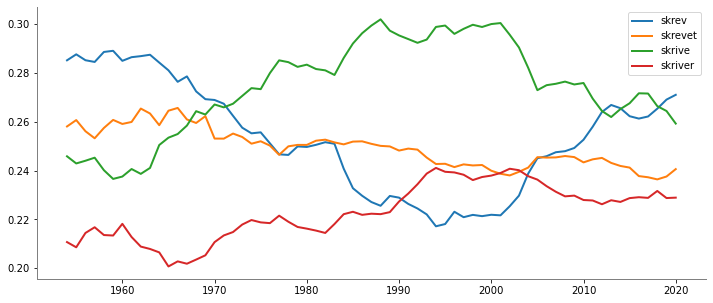

In [16]:
nplot("skriver skrive skrev skrevet".split())

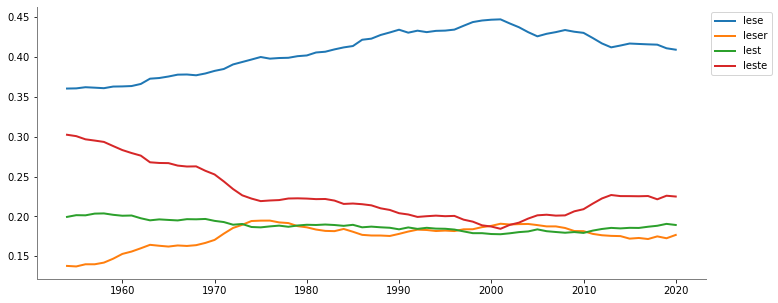

In [15]:
nplot("leser lese leste lest".split())

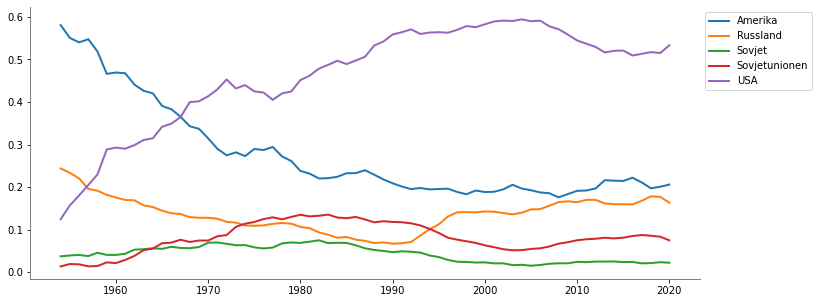

In [17]:
nplot("USA Amerika Russland Sovjet Sovjetunionen".split())

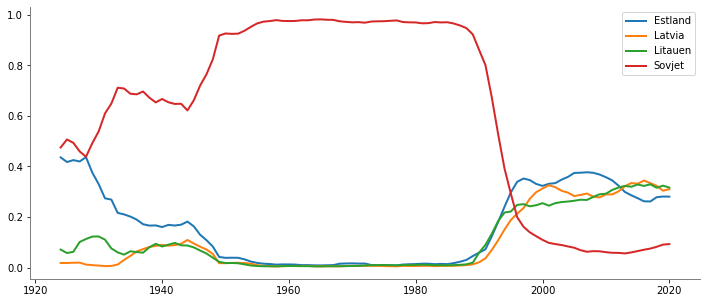

In [19]:
nplot("Latvia Litauen Estland Sovjet".split(), period = (1920, 2020), func = d2.ngram_news)

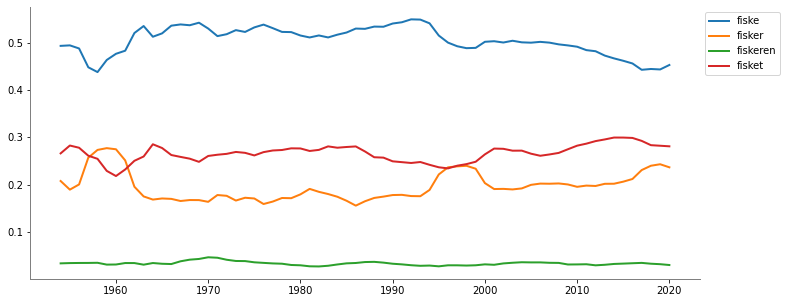

In [36]:
nplot("fisker fiske fiskeren fisket".split(), func = d2.ngram_book)

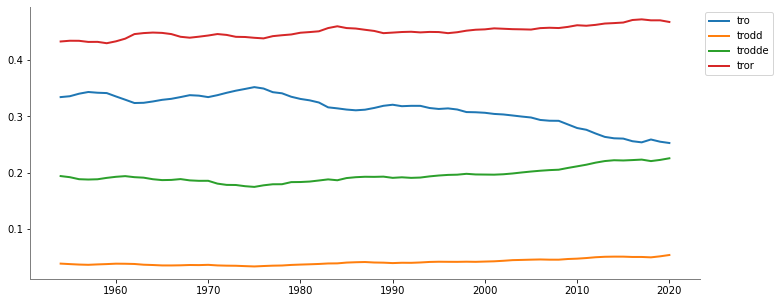

In [51]:
nplot("tro tror trodde trodd".split(), func = d2.ngram_book)

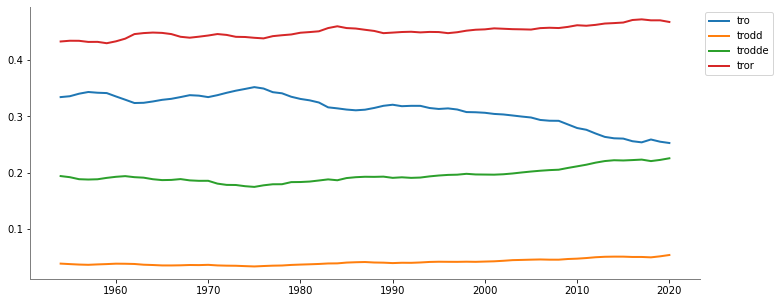

In [51]:
nplot("tro tror trodde trodd".split(), func = d2.ngram_book)

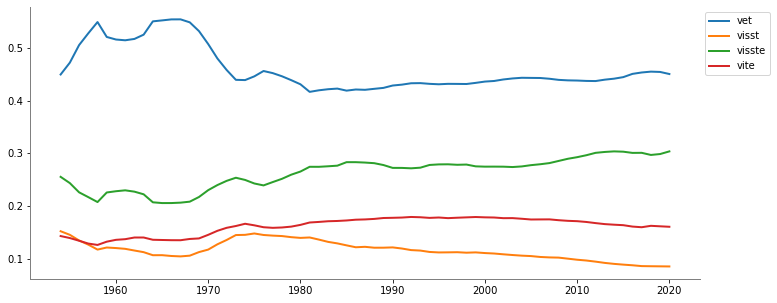

In [52]:
nplot("vite vet visste visst".split(), func = d2.ngram_book)

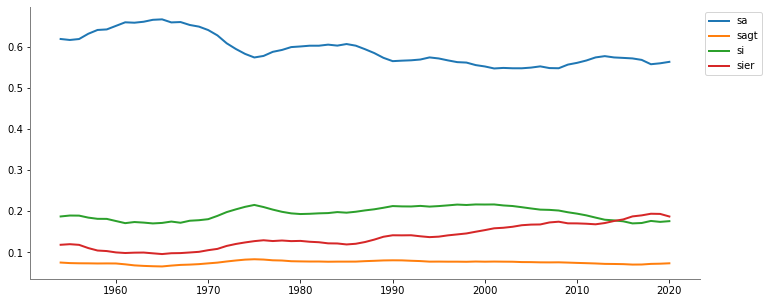

In [53]:
nplot("si sier sa sagt".split(), func = d2.ngram_book)

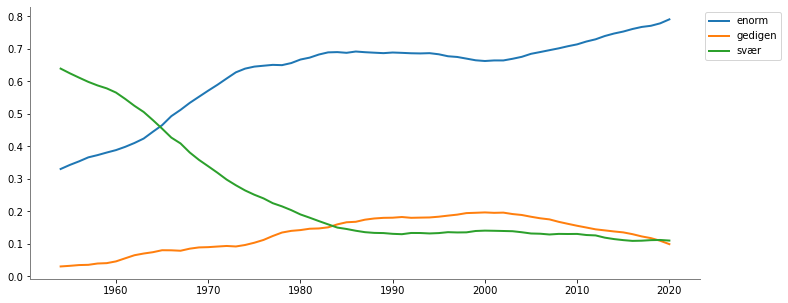

In [56]:
nplot(" svær gedigen enorm".split(), func = d2.ngram_news)

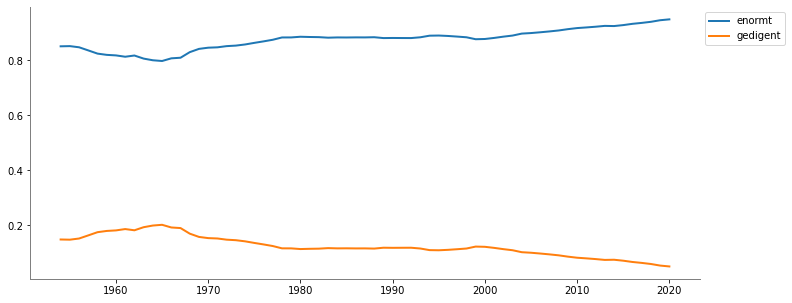

In [60]:
nplot("gedigent enormt".split(), func = d2.ngram_news)

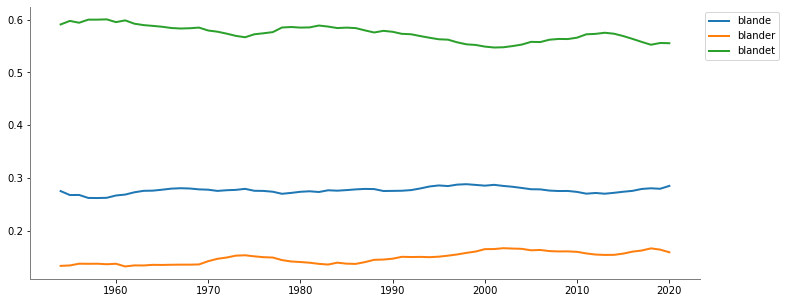

In [38]:
nplot("blande blander blandet".split())

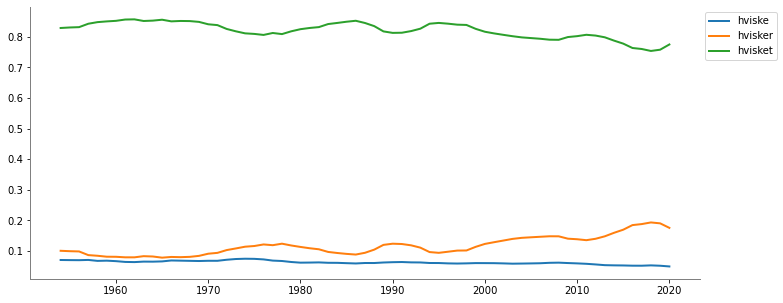

In [61]:
nplot("hviske hvisker hvisket".split())

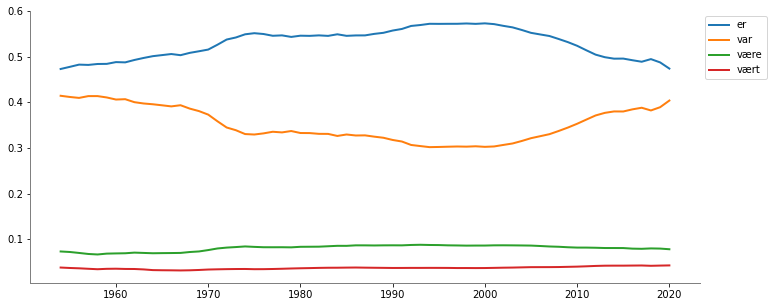

In [64]:
nplot("være er var vært".split())

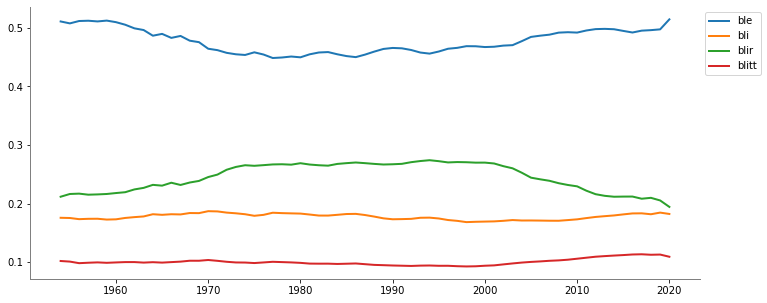

In [63]:
nplot("bli blir ble blitt".split())

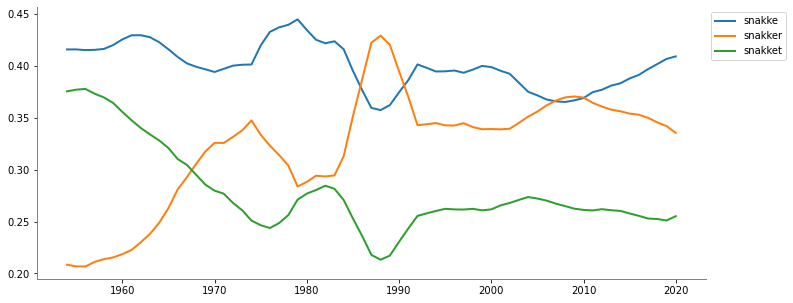

In [22]:
nplot("snakke snakker snakket".split())

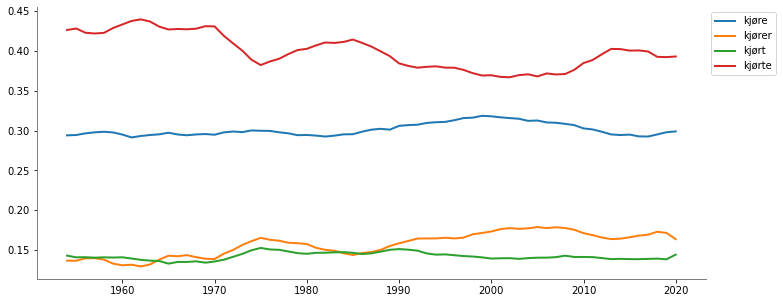

In [65]:
nplot("kjøre kjører kjørte kjørt".split())

In [48]:
d.sum(axis = 1)

1950    3578742
1951    2582538
1952    2655870
1953    2726740
1954    2500821
1955    2442505
1956    2131395
1957    2602211
1958    2902895
1959    2980566
1960    3226526
1961    2923664
1962    3168797
1963    2931266
1964    2982220
1965    3297412
1966    2981541
1967    3763837
1968    3718616
1969    4012569
1970    4250052
1971    3414475
1972    3533686
1973    3547087
1974    3511518
1975    3865573
1976    4688800
1977    5264845
1978    5426119
1979    5779436
1980    5497842
1981    5371649
1982    6097836
1983    5927226
1984    5713349
1985    6529692
1986    5835229
1987    6231130
1988    5690197
1989    5665212
1990    7877346
dtype: int64

In [8]:
def uni(x):
    df = nb.unigram(x, period=(1930, 2010))
    df.columns = [x]
    return df

In [9]:
def compare(kohort):
    df = pd.concat(map(uni, kohort), axis=1)
    dfsum = df.sum(axis=1)
    return pd.concat([ (df[x]/(dfsum)).rename(x) for x in df], axis=1)

In [10]:
comp_kohort = compare(kohort.split())

In [11]:
comp_acc = compare(kohort_acc.split())

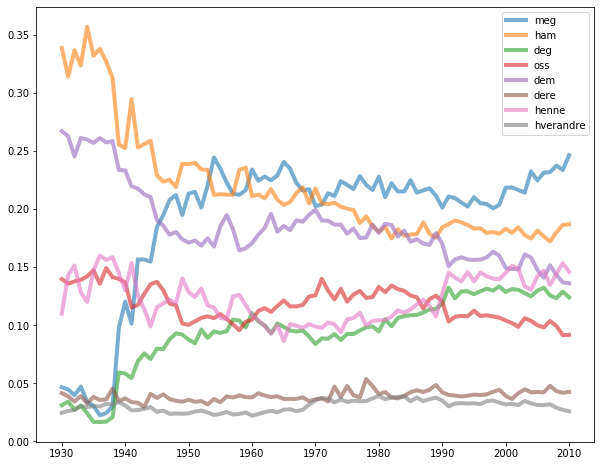

In [12]:
comp_acc.plot(figsize = (10,8), lw = 4, alpha=.6)

In [21]:
c = lambda x: pd.concat([nb.frame(nb.unigram(w, period=(1600, 2000)), w) for w in [y.strip() for y in x.split(",")]], axis=1)

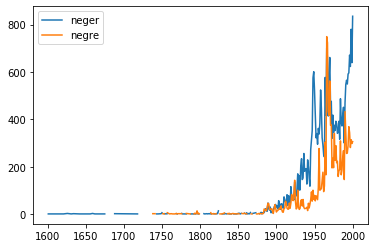

In [26]:
c('neger, negre').plot()

In [ ]:
- Hødnebø 1960 (Norske diplomer til og med år 1300),
- Hødnebø 1966 (Utvalg av norske diplomer 1350--1550),
- Rindal og Halvorsen 2009 (Middelalderbrev fra Ringerike 1263--1570).

In [33]:
nb.book_urn(author = "%HALVORSE%rindal%")

[]

In [35]:
urns = [2009090904028,2011031520003,2016011948059]

In [36]:
nb.metadata(urns)

[[2009090904028,
  '',
  1960,
  'Norske diplomer til og med år 1300',
  '',
  'Selskapet til utgivelse av gamle norske håndskrifter',
  'notfiction',
  '654f28fb0a30617ed98e1a6d4776b66c',
  'mul',
  ''],
 [2016011948059,
  '',
  2009,
  'Middelalderbrev fra Ringerike 1263-1570',
  'originaltekster med oversettelse til moderne norsk',
  'Kolltopp forl.',
  'notfiction',
  'abd2091d1098a8e63691c7a63e921b93',
  'nob',
  '']]

In [39]:
nb.urn_concordance(urns=urns, word="kirken", size=20)

"Norske diplomer til og med år 1300, , 1960",minst kampen og uroen innen,kirken,selv .
"Norske diplomer til og med år 1300, , 1960",herre Bjarne Erlingssons framferd mot,kirken,. Herre Bjarne hadde gått
"Norske diplomer til og med år 1300, , 1960","11 ) , nemlig at",kirken,skulle få sine tiender og
"Norske diplomer til og med år 1300, , 1960",av brevene vedrører innbyrdes-striden i,kirken,", den slo ut særlig"
"Norske diplomer til og med år 1300, , 1960",", nå er kommet under",kirken,", og forbyr bøndene på"
"Norske diplomer til og med år 1300, , 1960","i Oslo , mot at",kirken,får en del andre gårder
"Norske diplomer til og med år 1300, , 1960",til korsbrødrene å rå for,kirken,under erkestolens vakans .
"Norske diplomer til og med år 1300, , 1960",med en halvdel hver til,kirken,"og korsbrødrene , for at"
"Norske diplomer til og med år 1300, , 1960",ved Laf r anz -,kirken,"i Tønsberg , gir en"
"Norske diplomer til og med år 1300, , 1960",", hadde skjenket jorda til",kirken,", og mot at gårdens"
"Norske diplomer til og med år 1300, , 1960",hadde testamentert av gården Vollißennebutil,kirken,og korsbrødrene .
